# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# Chapitre 4 - Analyse en composantes principales


## Contexte : Poids des poissons

On reprend le fichier *fishweights.csv* du TD4 contenant les caractéristiques de 158 poissons péchés dans le lac Laengelmavesi en Finlande. Nous nous intéressons aux poids des poissons (Weight en grammes) en fonction de variables explicatives suivantes :
- l'espèce de poisson (species) ;
- la longueur standard (StandardLength) ;
- la longeur non standard  (NonStandardLength) ;
- la longueur totale (TotalLength) ;
- la hauteur (Height) ;
- la largeur (Width).


          ___/////___                  _
         /           \    ___          |
       /\             \_ /  /          H
     <   )            __)  \           |
       \/_\\_________/   \__\          _

     |------- SL -------|
     |------- NSL ---------|
     |------- TL ------------|
     

On a vu au TD 4 que les variables explicatives étaient fortement multicolinéaire. Nous verrons comment traiter le problème de la multicolinéarité avec l'analyse en composantes principales.

In [1]:
using CSV 
using DataFrames
using Distributions
using Gadfly
using LinearAlgebra
using Statistics

In [2]:
include("functions.jl")

compute_VIF (generic function with 1 method)

## Chargement des données

On ne s'intéresse qu'à l'espèce "Perche". 

In [3]:
data = CSV.read("fishweights.csv", DataFrame)
filter!(row -> row.Species == "Perche", data)
first(data,10)

,Species,Weight,StandardLength,NonStandardLength,TotalLength,Height,Width
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,Perche,5.9,7.5,8.4,8.8,2.1,1.4
2,Perche,32.0,12.5,13.7,14.7,3.5,2.0
3,Perche,40.0,13.8,15.0,16.0,3.8,2.4
4,Perche,51.5,15.0,16.2,17.2,4.6,2.6
5,Perche,70.0,15.7,17.4,18.5,4.6,2.9
6,Perche,100.0,16.2,18.0,19.2,5.2,3.3
7,Perche,78.0,16.8,18.7,19.4,5.2,3.1
8,Perche,80.0,17.2,19.0,20.2,5.6,3.1
9,Perche,85.0,17.8,19.6,20.8,5.1,3.0


## Extraction des matrices

On convertit les variables d'un DataFrame à une matrice.

Pour les poids, on se rappelle qu'au TD4, la relation avec les variables explicatives était linéaire avec la racine cubique des poids. On effectue d'emblée cette transformation ici.

In [4]:
X = convert(Array{Float64}, data[:, 3:end])

y = (data.Weight).^(1/3)

Z = standardize(X)
standardize!(y)

56-element Array{Float64,1}:
 -2.1253635891894875
 -1.5139024972155697
 -1.4043134375695225
 -1.2699555091807457
 -1.0907970821422475
 -0.8582063255451415
 -1.0231287940472507
 -1.006941562589792
 -0.9676207631726579
 -0.9676207631726579
 -0.791227516365905
 -0.7592540932941642
 -0.6979861483855868
  ⋮
  1.382886287012545
  0.9392087786575253
  1.2510162152941544
  1.3014324780515858
  1.382886287012545
  1.5593993517853657
  1.2510162152941544
  1.6814602080594099
  1.5371587380666367
  1.6814602080594099
  1.5371587380666367
  1.5371587380666367

# 4.1 Rappel d'algèbre linéaire

## 4.1.5 Décomposition en valeurs singulières

In [5]:
# Décomposition en valeurs singulières de la matrice rectangulaire Z

F = svd(Z)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
56×5 Array{Float64,2}:
 -0.280645   -0.15892    -0.000921394   0.213586    0.00164755
 -0.209698   -0.010013    0.0338458     0.0665176  -0.170641
 -0.189073   -0.0443209  -0.0500581     0.130557   -0.156495
 -0.167663   -0.0614599   0.103865      0.190402   -0.141928
 -0.153581   -0.0667803  -0.0397645    -0.0379928   0.0349297
 -0.136494   -0.174362    0.0125776    -0.0869669   0.0415211
 -0.134927   -0.0781427   0.0503362     0.0850494   0.363129
 -0.126701   -0.066681    0.163594     -0.0488482   0.0403451
 -0.127495    0.0400418  -0.00496358   -0.032525    0.0314262
 -0.127468    0.123066    0.0409985     0.0574658   0.138664
 -0.0998979  -0.0616053  -0.0543041    -0.172989   -0.0245777
 -0.102544    0.0111561   0.107254     -0.17862    -0.0305175
 -0.0983879  -0.0901678  -0.0853681    -0.170477   -0.0218079
  ⋮                                                
  0.173654   -0.141859   -0.286018      0.0841566  -0.142047
  0.151003    

In [6]:
# Extraction de la matrice U
U = F.U

56×5 Array{Float64,2}:
 -0.280645   -0.15892    -0.000921394   0.213586    0.00164755
 -0.209698   -0.010013    0.0338458     0.0665176  -0.170641
 -0.189073   -0.0443209  -0.0500581     0.130557   -0.156495
 -0.167663   -0.0614599   0.103865      0.190402   -0.141928
 -0.153581   -0.0667803  -0.0397645    -0.0379928   0.0349297
 -0.136494   -0.174362    0.0125776    -0.0869669   0.0415211
 -0.134927   -0.0781427   0.0503362     0.0850494   0.363129
 -0.126701   -0.066681    0.163594     -0.0488482   0.0403451
 -0.127495    0.0400418  -0.00496358   -0.032525    0.0314262
 -0.127468    0.123066    0.0409985     0.0574658   0.138664
 -0.0998979  -0.0616053  -0.0543041    -0.172989   -0.0245777
 -0.102544    0.0111561   0.107254     -0.17862    -0.0305175
 -0.0983879  -0.0901678  -0.0853681    -0.170477   -0.0218079
  ⋮                                                
  0.173654   -0.141859   -0.286018      0.0841566  -0.142047
  0.151003    0.286578    0.179941      0.0464729  -0.183593
 

In [7]:
# Extraction de la matrice V
V = F.V

5×5 Adjoint{Float64,Array{Float64,2}}:
 0.448456   0.347912  -0.125413   0.738538    -0.34158
 0.44852    0.34603   -0.12546   -0.0818747    0.810339
 0.448574   0.330668  -0.122574  -0.669157    -0.476073
 0.446756  -0.276503   0.850836   0.00485262   0.00301402
 0.443743  -0.757249  -0.47915    0.00792923   0.00436652

In [8]:
# Extraction des valeurs singulières
γ = F.S

5-element Array{Float64,1}:
 16.492344734494377
  1.4879378139586565
  0.8656790131711153
  0.1771376017762356
  0.08847788751756501

# 4.2 Analyse en composantes principales

In [9]:
w = round.(V[:,1], digits=2)

println("La première composante principale est composée de : ")
println("\t  T₁ = $(w[1]) Z₁ + $(w[2]) Z₂ + $(w[3]) Z₃ + $(w[4]) Z₄ + $(w[5]) Z₅")

w = round.(V[:,2], digits=2)
println(" ")
println("La deuxième composante principale est composée de : ")
println("\t  T₂ = $(w[1]) Z₁ + $(w[2]) Z₂ + $(w[3]) Z₃ + $(w[4]) Z₄ + $(w[5]) Z₅")

w = round.(V[:,3], digits=2)
println(" ")
println("La troisième composante principale est composée de : ")
println("\t  T₃ = $(w[1]) Z₁ + $(w[2]) Z₂ + $(w[3]) Z₃ + $(w[4]) Z₄ + $(w[5]) Z₅")

w = round.(V[:,4], digits=2)
println(" ")
println("La quatrième composante principale est composée de : ")
println("\t  T₄ = $(w[1]) Z₁ + $(w[2]) Z₂ + $(w[3]) Z₃ + $(w[4]) Z₄ + $(w[5]) Z₅")

w = round.(V[:,5], digits=2)
println(" ")
println("La cinquième composante principale est composée de : ")
println("\t  T₅ = $(w[1]) Z₁ + $(w[2]) Z₂ + $(w[3]) Z₃ + $(w[4]) Z₄ + $(w[5]) Z₅")

La première composante principale est composée de : 
	  T₁ = 0.45 Z₁ + 0.45 Z₂ + 0.45 Z₃ + 0.45 Z₄ + 0.44 Z₅
 
La deuxième composante principale est composée de : 
	  T₂ = 0.35 Z₁ + 0.35 Z₂ + 0.33 Z₃ + -0.28 Z₄ + -0.76 Z₅
 
La troisième composante principale est composée de : 
	  T₃ = -0.13 Z₁ + -0.13 Z₂ + -0.12 Z₃ + 0.85 Z₄ + -0.48 Z₅
 
La quatrième composante principale est composée de : 
	  T₄ = 0.74 Z₁ + -0.08 Z₂ + -0.67 Z₃ + 0.0 Z₄ + 0.01 Z₅
 
La cinquième composante principale est composée de : 
	  T₅ = -0.34 Z₁ + 0.81 Z₂ + -0.48 Z₃ + 0.0 Z₄ + 0.0 Z₅


## Variance expliquée par les composantes principales

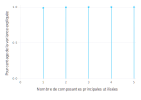

In [10]:
v = cumsum(γ.^2) / sum(γ.^2)

plot(x=1:5, y=v, Geom.point, Geom.hair,
    Guide.xlabel("Nombre de composantes principales utilisées"), 
    Guide.ylabel("Pourcentage de la variance expliquée"))

Presque 99% de la variance du jeu de donnée est expliquée par la première composante principale. Si on voulait réduire la taille du jeu de données, on pourrait conserver que la première composante principale et disposer des 5 variables explicatives. Seulement 1% de l'information serait perdue pour un jeu de données 5 fois plus petit (une seule variable transformée conservée au lieu des cinq originales). 

# 4.3 Régression sur composantes principales

## Utilisation des composantes les plus importantes

Puisque la première composante explique plus de 98.5% de la variabilité des variables explicatives, on peut utiliser que cette composante comme seule variable explicative. De cette façon, on ne perd presque pas d'information.

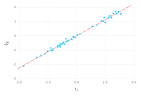

In [11]:
T₁ = Z*V[:,1]

η̂ = T₁\y

plot(x = T₁, y = y, Geom.point, slope=[η̂], Geom.abline(color="red", style=:dash),
    Guide.xlabel("t₁"), Guide.ylabel("∛y"))

## Utilisation de toutes les composantes

In [12]:
# Calcul de la matrice des composantes principales

T = Z*V

56×5 Array{Float64,2}:
 -4.62849  -0.236463   -0.000797631   0.037834     0.000145772
 -3.45841  -0.0148987   0.0292996     0.0117828   -0.0150979
 -3.11826  -0.0659468  -0.0433343     0.0231265   -0.0138464
 -2.76515  -0.0914485   0.089914      0.0337273   -0.0125575
 -2.53292  -0.099365   -0.0344233    -0.00672995   0.0030905
 -2.2511   -0.25944     0.0108882    -0.0154051    0.0036737
 -2.22527  -0.116271    0.043575      0.0150654    0.0321289
 -2.08959  -0.0992172   0.14162      -0.00865285   0.00356965
 -2.10268   0.0595797  -0.00429687   -0.0057614    0.00278053
 -2.10224   0.183115    0.0354916     0.0101793    0.0122687
 -1.64755  -0.0916649  -0.0470099    -0.0306429   -0.00217458
 -1.69119   0.0165995   0.0928474    -0.0316404   -0.00270012
 -1.62265  -0.134164   -0.0739013    -0.0301978   -0.00192952
  ⋮                                               
  2.86396  -0.211078   -0.2476        0.0149073   -0.012568
  2.4904    0.426411    0.155771      0.0082321   -0.016244
  3.04

On peut vérifier que les composantes principales ne souffrent pas de multicolinéarité. En effet, toutes les composansantes sont orthogonales.

In [13]:
compute_VIF(T)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0000000000000004
 1.0
 1.0

Calcul des coefficients de régression dans l'espace des composantes principales.

In [14]:
η̂ = T\y

5-element Array{Float64,1}:
  0.4481005663366988
 -0.10557499657777367
  0.10220683191165038
 -0.03592646723735638
 -0.2728195665325352

Transformation des coefficients à l'espace des variables explicatives standardisées.

In [15]:
β̂ = V*η̂

5-element Array{Float64,1}:
  0.2180613803757036
 -0.06650781164033241
  0.3074902921550031
  0.3153481302997089
  0.2283394035216132

On peut maintenant utiliser les coefficients transformés sur la matrice Z. Les coefficient ont été estimés dans l'espace des composantes principales mais on revient à l'espace orginal pour faciliter les calculs et l'interprétation. 

Ces calculs permettent de trouver les meilleurs coefficients même dans le cas où il y a de la multicolinéarité. Cette approche est très pratique si l'on souhaite utiliser toutes les variables explicatives, même s'il y a multicolinéarité, sans procéder à la fastidieuce tâche de la sélection de modèle.

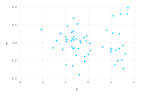

In [16]:
ŷ = Z*β̂
e = ŷ - y
plot(x = ŷ, y=e, Geom.point)